In [61]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.mixture import BayesianGaussianMixture
import matplotlib.pyplot as plt
import seaborn as sns

In [62]:
df = pd.read_csv('Gia SMP va SMPcap 2021(Giá thị trường SMP).csv', encoding='latin-1', sep=';')
df.head(5)

,Ngày,1,2,3,4,5,6,7,8,9,...,39,40,41,42,43,44,45,46,47,48
0,01/01/2021,964.4,964.4,964.4,964.4,964.4,964.4,964.4,964.4,964.4,...,964.4,964.4,964.4,964.4,964.4,964.4,964.4,964.4,964.4,964.4
1,01/02/2021,1019.7,1019.7,1019.7,1019.7,1019.7,1019.7,1019.7,1019.7,1019.7,...,1019.7,1019.7,1019.7,1019.7,1019.7,1019.7,1019.7,1019.7,1019.7,1019.7
2,01/03/2021,988.4,988.4,988.4,988.4,988.4,988.4,988.4,988.4,988.4,...,988.4,988.4,988.4,988.4,988.4,988.4,988.4,988.4,988.4,988.4
3,01/04/2021,1002.0,1002.0,1002.0,1002.0,1002.0,1002.0,1002.0,1002.0,1002.1,...,1010.8,1010.8,1010.8,1010.8,1010.8,1010.8,1010.8,1010.8,1010.8,1010.8
4,01/05/2021,1061.5,1061.5,1061.5,1061.5,1061.5,1061.5,1061.5,1061.5,1061.5,...,1061.5,1061.5,1061.5,1061.5,1061.5,1061.5,1061.5,1061.5,1061.5,1061.5


In [63]:
feats = ['14', '15']

In [64]:
df[feats].head()

,14,15
0,964.4,964.4
1,1019.7,1019.7
2,988.4,988.4
3,1010.8,1010.8
4,1061.5,1061.5


### 1. EDA dữ liệu

#### Kiểm tra dữ liệu thiếu

In [65]:
df[feats].isna().mean()

14    0.0
15    0.0
dtype: float64

#### Sử dụng biểu đồ heatmap đề kiểm tra độ tương quan của dữ liệu

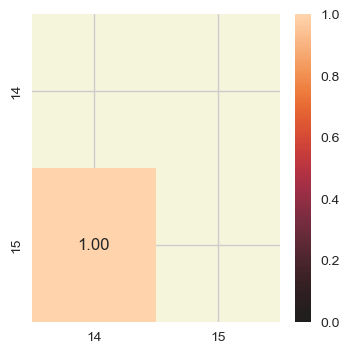

In [66]:
mask = np.triu(np.ones_like(df[feats].corr(), dtype=bool))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
f, ax = plt.subplots(figsize=(4,4))
sns.heatmap(df[feats].corr(), mask=mask, vmax=1, vmin=0, center=0,annot=True,fmt='.2f');

#### Sử dụng biểu đồ đường thể hiện dữ liệu qua thời gian

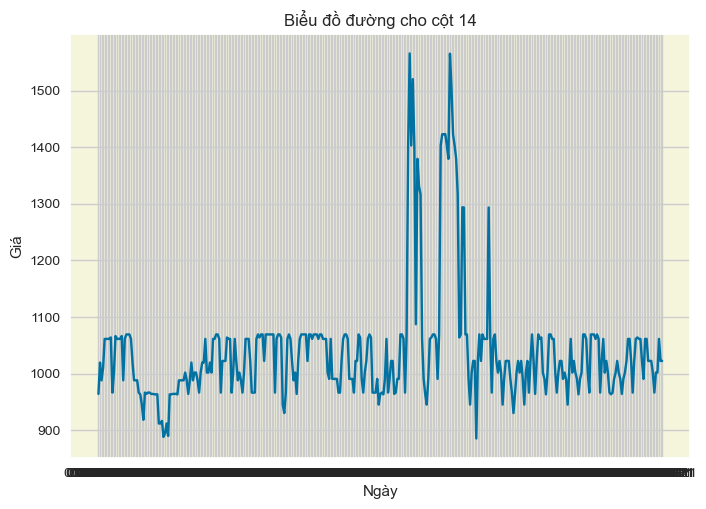

In [67]:
# Tạo biểu đồ đường bằng seaborn
sns.lineplot(x=df['Ngày'], y=df['14'], data=df)

# Thêm tiêu đề và nhãn trục
plt.title('Biểu đồ đường cho cột 14')
plt.xlabel('Ngày')
plt.ylabel('Giá')

# Hiển thị biểu đồ
plt.show()

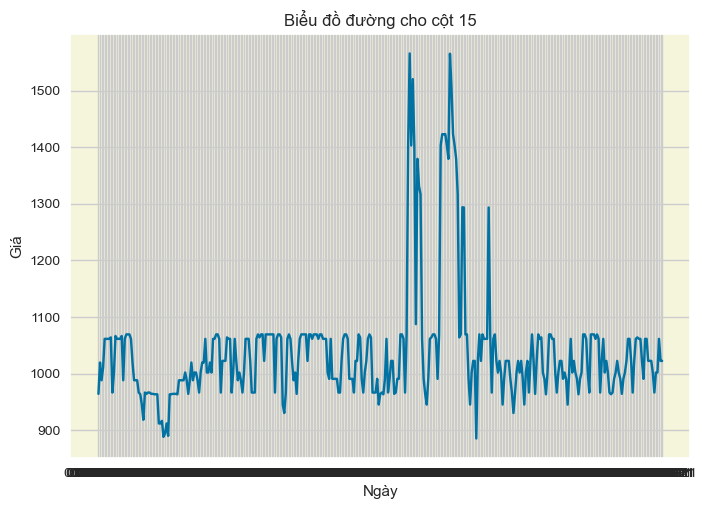

In [68]:
# Tạo biểu đồ đường bằng seaborn
sns.lineplot(x=df['Ngày'], y=df['15'], data=df)

# Thêm tiêu đề và nhãn trục
plt.title('Biểu đồ đường cho cột 15')
plt.xlabel('Ngày')
plt.ylabel('Giá')

# Hiển thị biểu đồ
plt.show()

In [69]:
transformer = StandardScaler()
X = transformer.fit_transform(np.array(df[feats]))

In [70]:
X[:5]

array([[-0.72298405, -0.72306502],
       [-0.19632568, -0.19639898],
       [-0.49441622, -0.49449386],
       [-0.28108625, -0.28116079],
       [ 0.20176329,  0.20169578]])

c:\Users\MSI\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\MSI\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
c:\Users\MSI\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\MSI\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less ch

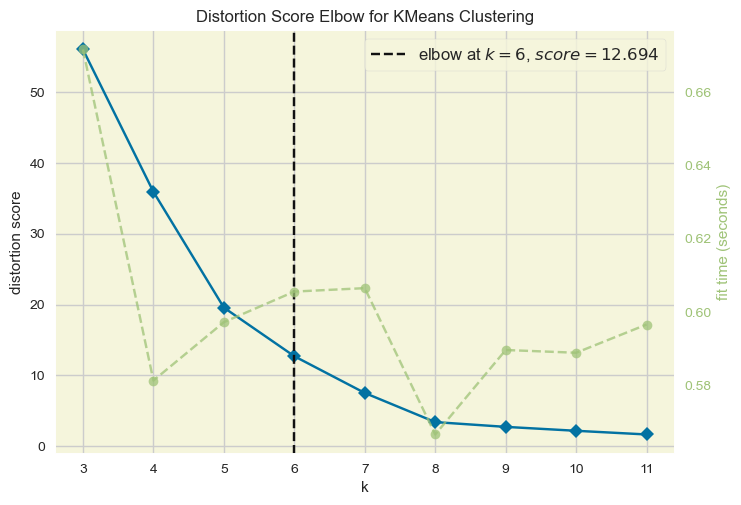

In [71]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

Elbow_M = KElbowVisualizer(KMeans(random_state=23), k=(3,12))
Elbow_M.fit(X)
Elbow_M.show();

### 2. Sử dụng Bayesian Gaussian Mixture

#### Thử với K = 5

In [72]:
BGM = BayesianGaussianMixture(n_components=5,covariance_type='full',random_state=1,n_init=12)
preds = BGM.fit_predict(X)
df["Clusters"]= preds

c:\Users\MSI\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
c:\Users\MSI\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
c:\Users\MSI\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
c:\Users\MSI\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with M

In [73]:
pp=BGM.predict_proba(X)
df_new=pd.DataFrame(X,columns=feats) 
df_new[[f'predict_proba_{i}' for i in range(5)]]=pp 
df_new['preds']=preds
df_new['predict_proba']=np.max(pp,axis=1)
df_new['predict']=np.argmax(pp,axis=1)
    
train_index=np.array([])
for n in range(5):
    n_inx=df_new[(df_new.preds==n) & (df_new.predict_proba > 0.5)].index
    train_index = np.concatenate((train_index, n_inx))

In [74]:
from sklearn.model_selection import StratifiedKFold
import lightgbm as lgb
X_new=df_new.loc[train_index][feats]
y=df_new.loc[train_index]['preds']

params_lgb = {'learning_rate': 0.06,'objective': 'multiclass','boosting': 'gbdt','n_jobs': -1,'verbosity': -1, 'num_classes':7} 

model_list=[]

gkf = StratifiedKFold(5)
for fold, (train_idx, valid_idx) in enumerate(gkf.split(X_new,y)):   

    tr_dataset = lgb.Dataset(X_new.iloc[train_idx],y.iloc[train_idx],feature_name = feats)
    vl_dataset = lgb.Dataset(X_new.iloc[valid_idx],y.iloc[valid_idx],feature_name = feats)
    
    model = lgb.train(params = params_lgb, 
                train_set = tr_dataset, 
                valid_sets =  vl_dataset, 
                num_boost_round = 5000, 
                callbacks=[ lgb.early_stopping(stopping_rounds=300, verbose=False), lgb.log_evaluation(period=200)])  
    
    model_list.append(model) 

[200]	valid_0's multi_logloss: 0.000177092
[400]	valid_0's multi_logloss: 0.000177092
[200]	valid_0's multi_logloss: 0.000222274
[400]	valid_0's multi_logloss: 0.000222274
[200]	valid_0's multi_logloss: 0.000215663
[400]	valid_0's multi_logloss: 0.000215663
[200]	valid_0's multi_logloss: 1.11844e-05
[400]	valid_0's multi_logloss: 1.11192e-05
[600]	valid_0's multi_logloss: 1.10838e-05
[800]	valid_0's multi_logloss: 1.10617e-05
[1000]	valid_0's multi_logloss: 1.10467e-05
[1200]	valid_0's multi_logloss: 1.10358e-05
[1400]	valid_0's multi_logloss: 1.10276e-05
[1600]	valid_0's multi_logloss: 1.10212e-05
[1800]	valid_0's multi_logloss: 1.1016e-05
[2000]	valid_0's multi_logloss: 1.10118e-05
[2200]	valid_0's multi_logloss: 1.10082e-05
[2400]	valid_0's multi_logloss: 1.10052e-05
[2600]	valid_0's multi_logloss: 1.10027e-05
[2800]	valid_0's multi_logloss: 1.10004e-05
[3000]	valid_0's multi_logloss: 1.09985e-05
[3200]	valid_0's multi_logloss: 1.09967e-05
[3400]	valid_0's multi_logloss: 1.09952e-05

In [75]:
lgb_preds=0
for model in model_list:
    lgb_preds+=model.predict(df_new[feats])

In [76]:
labels=np.argmax(lgb_preds,axis=1)

- Nhãn của từng điểm dữ liệu sau khi training xong

In [77]:
u = np.unique(labels)
u

array([0, 1, 2], dtype=int64)

C:\Users\MSI\AppData\Local\Temp\ipykernel_14556\1711567272.py:3: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(df['14'], df['15'], s=40, marker='o', cmap = 'rainbow' )


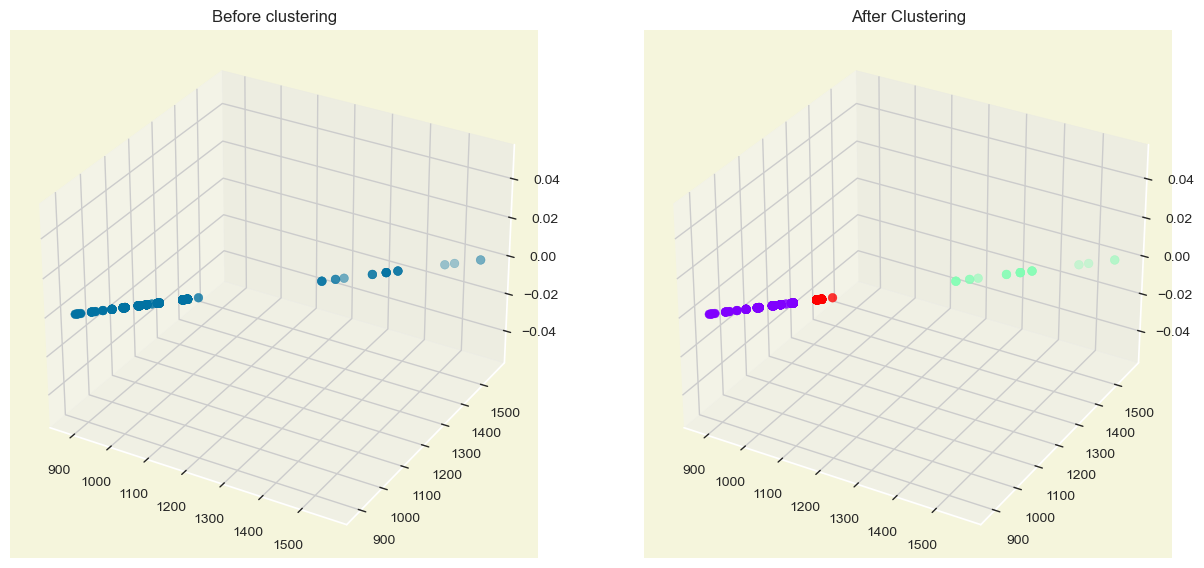

In [78]:
fig = plt.figure(figsize=(15,8))
ax = plt.subplot(1,2,1, projection='3d', label="bla")
ax.scatter(df['14'], df['15'], s=40, marker='o', cmap = 'rainbow' )
ax.set_title("Before clustering")
ax = plt.subplot(1,2,2, projection='3d', label="bla")
ax.scatter(df['14'], df['15'], s=40, c=df["Clusters"], marker='o',cmap="rainbow")
ax.set_title("After Clustering")
plt.show()

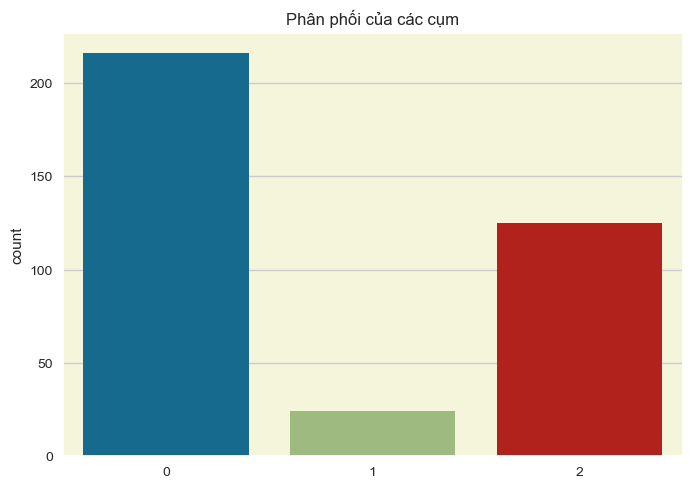

In [79]:
pl = sns.countplot(x=np.argmax(lgb_preds,axis=1))
pl.set_title("Phân phối của các cụm")
plt.show()

#### Thử với K=4

In [80]:
BGM = BayesianGaussianMixture(n_components=4,covariance_type='full',random_state=1,n_init=12)
preds = BGM.fit_predict(X)
df["Clusters"]= preds

c:\Users\MSI\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
c:\Users\MSI\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
c:\Users\MSI\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
c:\Users\MSI\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with M

In [81]:
pp=BGM.predict_proba(X)
df_new=pd.DataFrame(X,columns=feats) 
df_new[[f'predict_proba_{i}' for i in range(4)]]=pp 
df_new['preds']=preds
df_new['predict_proba']=np.max(pp,axis=1)
df_new['predict']=np.argmax(pp,axis=1)
    
train_index=np.array([])
for n in range(4):
    n_inx=df_new[(df_new.preds==n) & (df_new.predict_proba > 0.5)].index
    train_index = np.concatenate((train_index, n_inx))

In [82]:
from sklearn.model_selection import StratifiedKFold
import lightgbm as lgb
X_new=df_new.loc[train_index][feats]
y=df_new.loc[train_index]['preds']

params_lgb = {'learning_rate': 0.06,'objective': 'multiclass','boosting': 'gbdt','n_jobs': -1,'verbosity': -1, 'num_classes':7} 

model_list=[]

gkf = StratifiedKFold(5)
for fold, (train_idx, valid_idx) in enumerate(gkf.split(X_new,y)):   

    tr_dataset = lgb.Dataset(X_new.iloc[train_idx],y.iloc[train_idx],feature_name = feats)
    vl_dataset = lgb.Dataset(X_new.iloc[valid_idx],y.iloc[valid_idx],feature_name = feats)
    
    model = lgb.train(params = params_lgb, 
                train_set = tr_dataset, 
                valid_sets =  vl_dataset, 
                num_boost_round = 5000, 
                callbacks=[ lgb.early_stopping(stopping_rounds=300, verbose=False), lgb.log_evaluation(period=200)])  
    
    model_list.append(model) 

[200]	valid_0's multi_logloss: 0.000177959
[400]	valid_0's multi_logloss: 0.000177959
[200]	valid_0's multi_logloss: 0.000223536
[400]	valid_0's multi_logloss: 0.000223536
[200]	valid_0's multi_logloss: 0.000215663
[400]	valid_0's multi_logloss: 0.000215663
[200]	valid_0's multi_logloss: 1.10816e-05
[400]	valid_0's multi_logloss: 1.10166e-05
[600]	valid_0's multi_logloss: 1.09813e-05
[800]	valid_0's multi_logloss: 1.09594e-05
[1000]	valid_0's multi_logloss: 1.09444e-05
[1200]	valid_0's multi_logloss: 1.09336e-05
[1400]	valid_0's multi_logloss: 1.09254e-05
[1600]	valid_0's multi_logloss: 1.0919e-05
[1800]	valid_0's multi_logloss: 1.09139e-05
[2000]	valid_0's multi_logloss: 1.09097e-05
[2200]	valid_0's multi_logloss: 1.09061e-05
[2400]	valid_0's multi_logloss: 1.09032e-05
[2600]	valid_0's multi_logloss: 1.09006e-05
[2800]	valid_0's multi_logloss: 1.08984e-05
[3000]	valid_0's multi_logloss: 1.08964e-05
[3200]	valid_0's multi_logloss: 1.08947e-05
[3400]	valid_0's multi_logloss: 1.08932e-05

In [83]:
lgb_preds=0
for model in model_list:
    lgb_preds+=model.predict(df_new[feats])
labels=np.argmax(lgb_preds,axis=1)

In [84]:
u = np.unique(labels)
u

array([0, 1, 2], dtype=int64)

C:\Users\MSI\AppData\Local\Temp\ipykernel_14556\3070964413.py:3: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(df['14'], df['15'], s=40, marker='o', cmap = 'rainbow' )


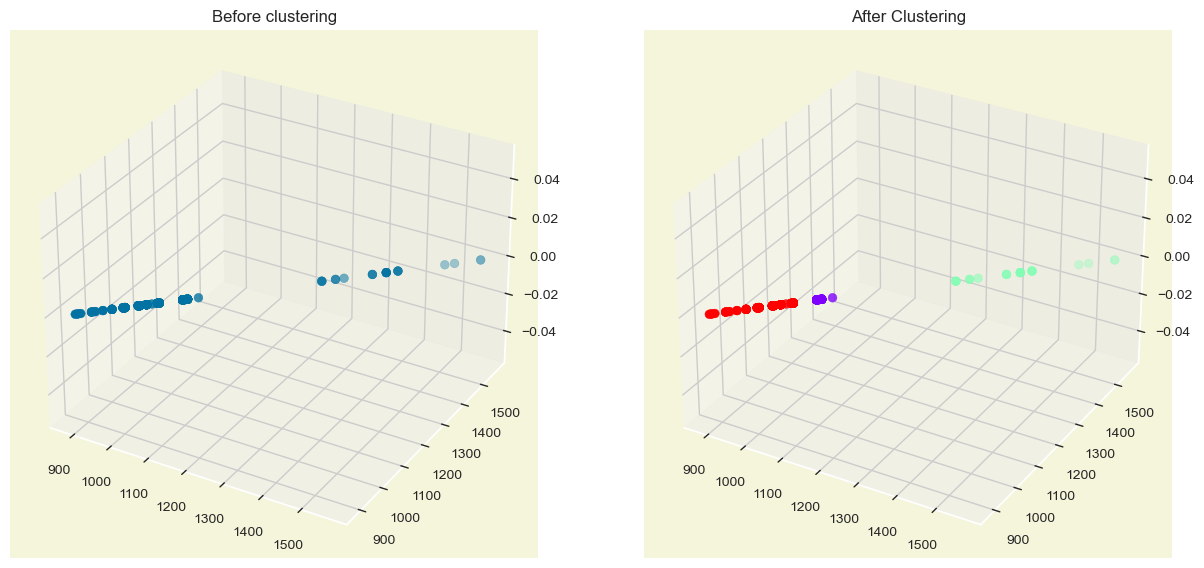

In [85]:
fig = plt.figure(figsize=(15,8))
ax = plt.subplot(1,2,1, projection='3d', label="bla")
ax.scatter(df['14'], df['15'], s=40, marker='o', cmap = 'rainbow' )
ax.set_title("Before clustering")
ax = plt.subplot(1,2,2, projection='3d', label="bla")
ax.scatter(df['14'], df['15'], s=40, c=df["Clusters"], marker='o',cmap="rainbow")
ax.set_title("After Clustering")
plt.show();

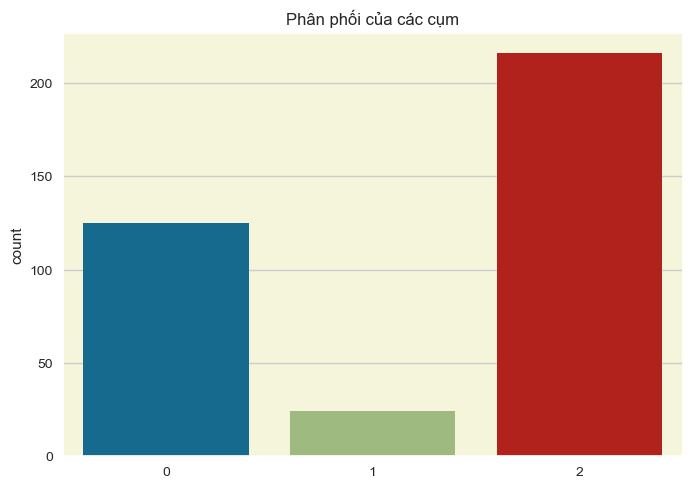

In [86]:
pl = sns.countplot(x=np.argmax(lgb_preds,axis=1))
pl.set_title("Phân phối của các cụm")
plt.show()

- Từ biểu đồ số cụm đã được phân chia đồng đều hơn

#### Thử với K=3

In [87]:
BGM = BayesianGaussianMixture(n_components=3,covariance_type='full',random_state=1,n_init=12)
preds = BGM.fit_predict(X)
df["Clusters"]= preds

c:\Users\MSI\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
c:\Users\MSI\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
c:\Users\MSI\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
c:\Users\MSI\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with M

In [88]:
pp=BGM.predict_proba(X)
df_new=pd.DataFrame(X,columns=feats) 
df_new[[f'predict_proba_{i}' for i in range(3)]]=pp 
df_new['preds']=preds
df_new['predict_proba']=np.max(pp,axis=1)
df_new['predict']=np.argmax(pp,axis=1)
    
train_index=np.array([])
for n in range(3):
    n_inx=df_new[(df_new.preds==n) & (df_new.predict_proba > 0.5)].index
    train_index = np.concatenate((train_index, n_inx))

In [89]:
from sklearn.model_selection import StratifiedKFold
import lightgbm as lgb
X_new=df_new.loc[train_index][feats]
y=df_new.loc[train_index]['preds']

params_lgb = {'learning_rate': 0.06,'objective': 'multiclass','boosting': 'gbdt','n_jobs': -1,'verbosity': -1, 'num_classes':7} 

model_list=[]

gkf = StratifiedKFold(5)
for fold, (train_idx, valid_idx) in enumerate(gkf.split(X_new,y)):   

    tr_dataset = lgb.Dataset(X_new.iloc[train_idx],y.iloc[train_idx],feature_name = feats)
    vl_dataset = lgb.Dataset(X_new.iloc[valid_idx],y.iloc[valid_idx],feature_name = feats)
    
    model = lgb.train(params = params_lgb, 
                train_set = tr_dataset, 
                valid_sets =  vl_dataset, 
                num_boost_round = 5000, 
                callbacks=[ lgb.early_stopping(stopping_rounds=300, verbose=False), lgb.log_evaluation(period=200)])  
    
    model_list.append(model) 

[200]	valid_0's multi_logloss: 0.000177092
[400]	valid_0's multi_logloss: 0.000177092
[200]	valid_0's multi_logloss: 0.000222274
[400]	valid_0's multi_logloss: 0.000222274
[200]	valid_0's multi_logloss: 0.000215663
[400]	valid_0's multi_logloss: 0.000215663
[200]	valid_0's multi_logloss: 1.11844e-05
[400]	valid_0's multi_logloss: 1.11192e-05
[600]	valid_0's multi_logloss: 1.10838e-05
[800]	valid_0's multi_logloss: 1.10617e-05
[1000]	valid_0's multi_logloss: 1.10467e-05
[1200]	valid_0's multi_logloss: 1.10358e-05
[1400]	valid_0's multi_logloss: 1.10276e-05
[1600]	valid_0's multi_logloss: 1.10212e-05
[1800]	valid_0's multi_logloss: 1.1016e-05
[2000]	valid_0's multi_logloss: 1.10118e-05
[2200]	valid_0's multi_logloss: 1.10082e-05
[2400]	valid_0's multi_logloss: 1.10052e-05
[2600]	valid_0's multi_logloss: 1.10027e-05
[2800]	valid_0's multi_logloss: 1.10004e-05
[3000]	valid_0's multi_logloss: 1.09985e-05
[3200]	valid_0's multi_logloss: 1.09967e-05
[3400]	valid_0's multi_logloss: 1.09952e-05

In [90]:
lgb_preds=0
for model in model_list:
    lgb_preds+=model.predict(df_new[feats])
labels=np.argmax(lgb_preds,axis=1)

In [91]:
u = np.unique(labels)
u

array([0, 1, 2], dtype=int64)

C:\Users\MSI\AppData\Local\Temp\ipykernel_14556\3070964413.py:3: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(df['14'], df['15'], s=40, marker='o', cmap = 'rainbow' )


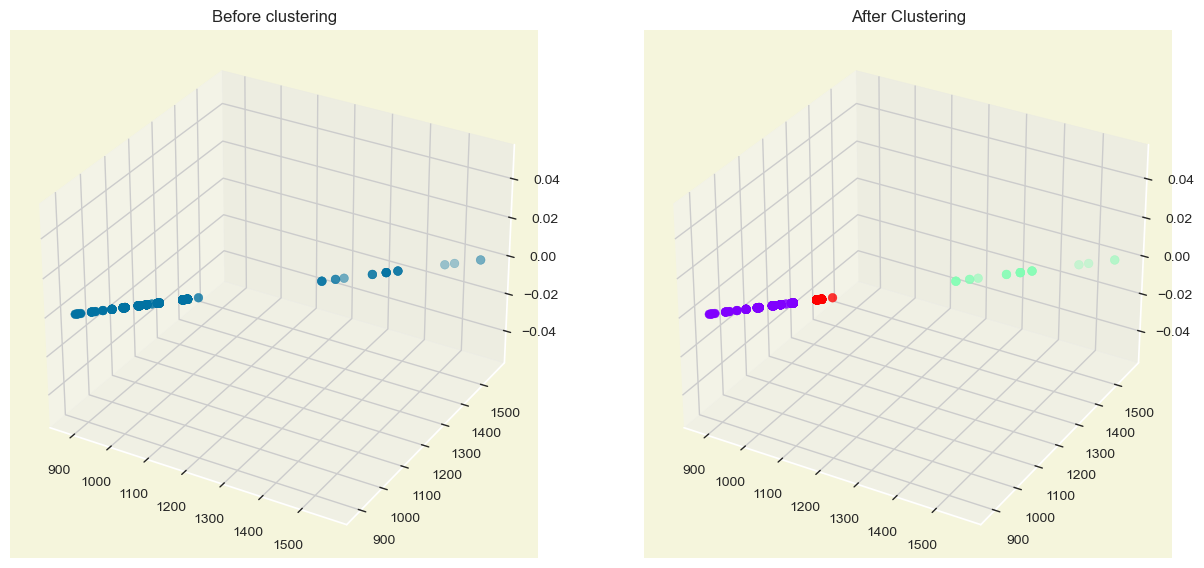

In [92]:
fig = plt.figure(figsize=(15,8))
ax = plt.subplot(1,2,1, projection='3d', label="bla")
ax.scatter(df['14'], df['15'], s=40, marker='o', cmap = 'rainbow' )
ax.set_title("Before clustering")
ax = plt.subplot(1,2,2, projection='3d', label="bla")
ax.scatter(df['14'], df['15'], s=40, c=df["Clusters"], marker='o',cmap="rainbow")
ax.set_title("After Clustering")
plt.show();

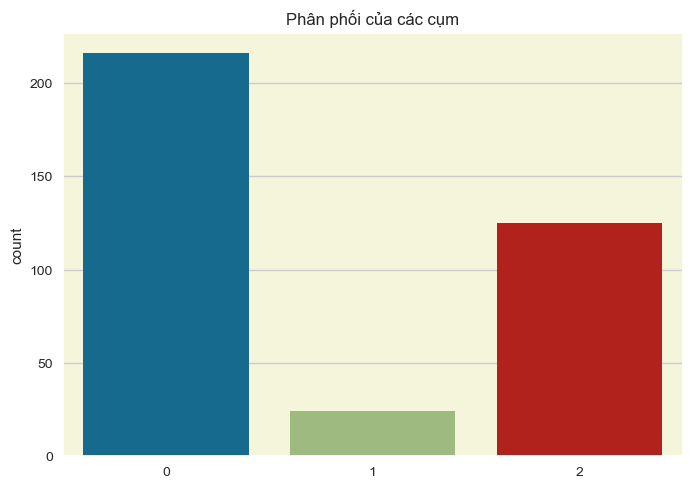

In [93]:
pl = sns.countplot(x=np.argmax(lgb_preds,axis=1))
pl.set_title("Phân phối của các cụm")
plt.show()

### 3. Sử dụng model LSTM để dự đoán giá trị tương lai

In [94]:
import tensorflow as tf
from keras import Model
from keras.layers import Input, Dense, Dropout
from keras.layers import LSTM

In [95]:
feats = ['Ngày', '14', '15']

In [96]:
df = df[feats]

In [97]:
df

,Ngày,14,15
0,01/01/2021,964.4,964.4
1,01/02/2021,1019.7,1019.7
2,01/03/2021,988.4,988.4
3,01/04/2021,1010.8,1010.8
4,01/05/2021,1061.5,1061.5
...,...,...,...
360,27/12/2021,1002.1,1002.1
361,28/12/2021,1002.0,1002.0
362,29/12/2021,1061.5,1061.5
363,30/12/2021,1022.6,1022.6


In [98]:
df['Ngày'] = pd.to_datetime(df['Ngày'], format='%d/%m/%Y')
df.sort_values(by='Ngày', ascending=True, inplace=True)
df.reset_index(drop=True, inplace=True)

In [99]:
test_size = df[df['Ngày'].dt.month==12].shape[0]
test_size

31

#### 
Biểu đồ thể hiện training và test trước khi dự đoán

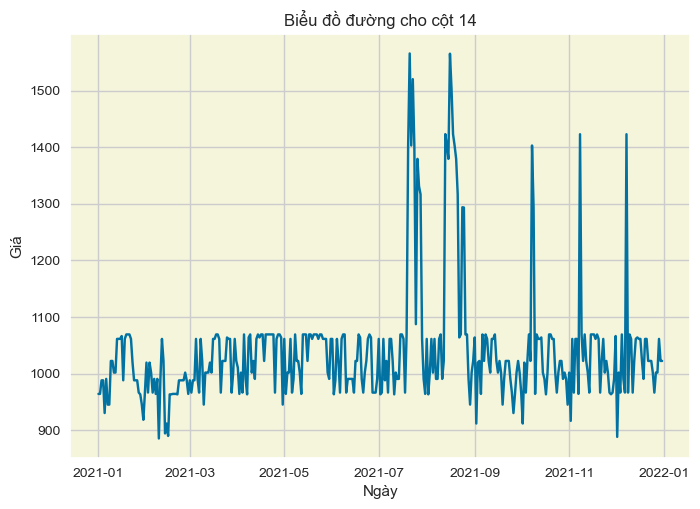

In [100]:
# Tạo biểu đồ đường bằng seaborn
sns.lineplot(x=df['Ngày'], y=df['14'], data=df)

# Thêm tiêu đề và nhãn trục
plt.title('Biểu đồ đường cho cột 14')
plt.xlabel('Ngày')
plt.ylabel('Giá')

# Hiển thị biểu đồ
plt.show()

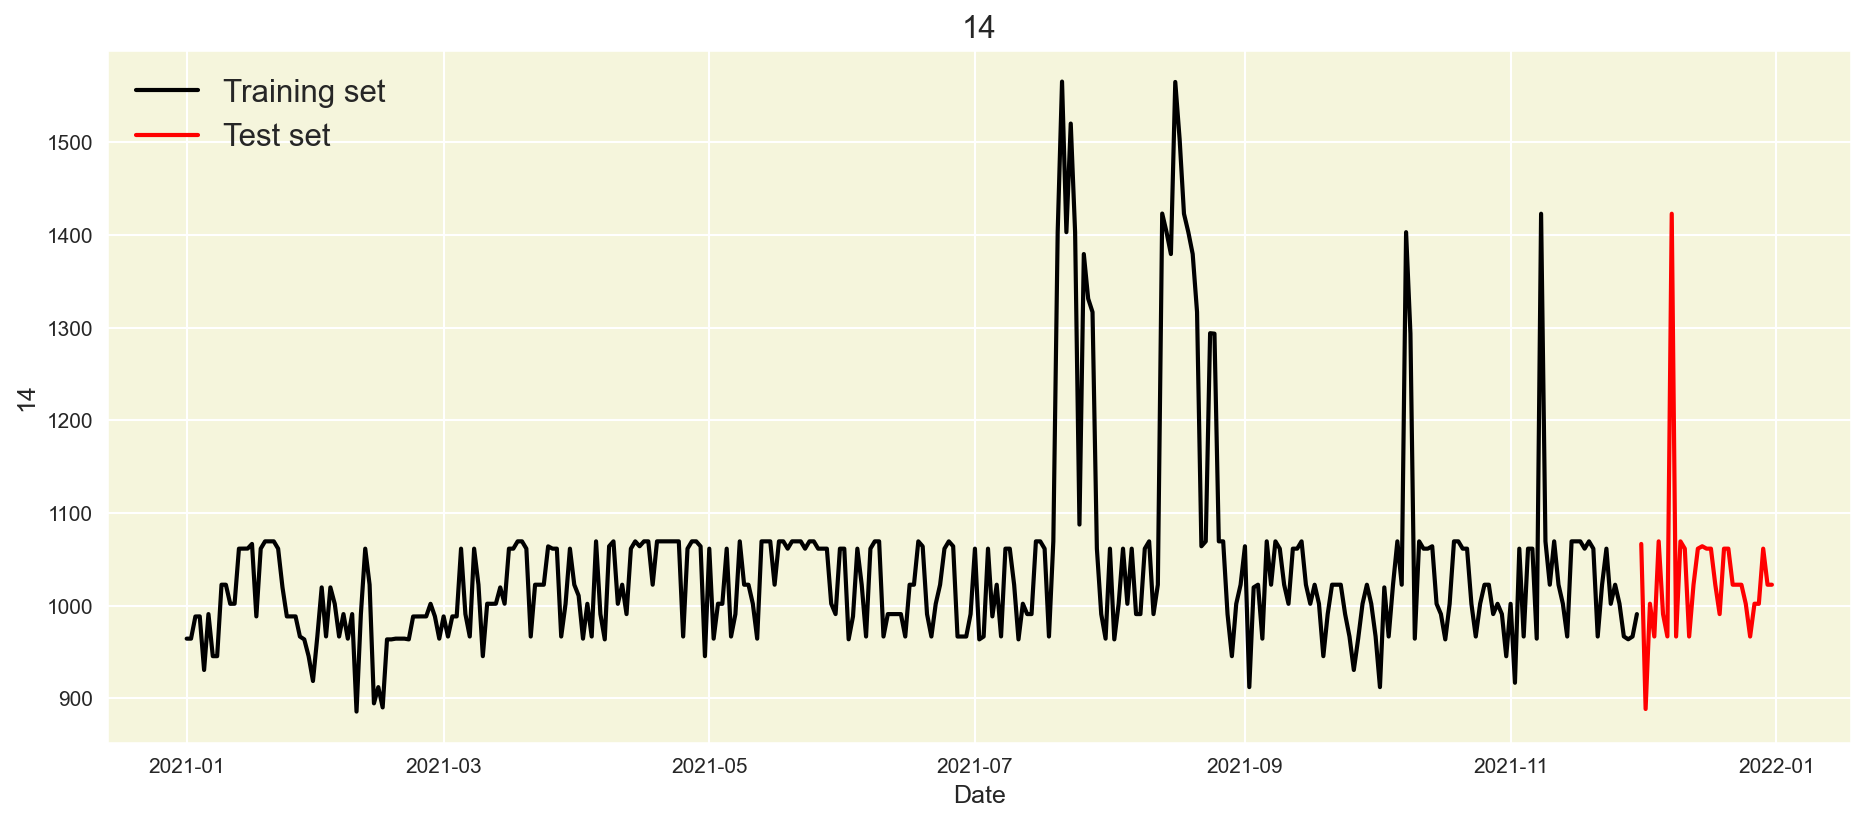

In [101]:
plt.figure(figsize=(15, 6), dpi=150)
plt.rcParams['axes.facecolor'] = 'beige'
plt.rc('axes',edgecolor='white')
plt.plot(df['Ngày'][:-test_size], df['14'][:-test_size], color='black', lw=2)
plt.plot(df['Ngày'][-test_size:], df['14'][-test_size:], color='red', lw=2)
plt.title('14', fontsize=15)
plt.xlabel('Date', fontsize=12)
plt.ylabel('14', fontsize=12)
plt.legend(['Training set', 'Test set'], loc='upper left', prop={'size': 15})
plt.grid(color='white')
plt.show()

####
 Sử dụng MinMaxScaler để đưa dữ liệu về khoảng (0;1)

In [102]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(df[['14']])

MinMaxScaler()

- Chọn window_size = 10 tức là 10 ngày dự đoán cho 1 ngày tiếp theo

In [103]:
window_size = 10

In [104]:
train_data = df[['14']][:-test_size]
train_data = scaler.transform(train_data)

In [105]:
X_train = []
y_train = []

for i in range(window_size, len(train_data)):
    X_train.append(train_data[i-window_size:i, 0])
    y_train.append(train_data[i, 0])

In [106]:
test_data = df[['14']][-test_size-window_size:]
test_data = scaler.transform(test_data)

In [107]:
X_test = []
y_test = []

for i in range(window_size, len(test_data)):
    X_test.append(test_data[i-window_size:i, 0])
    y_test.append(test_data[i, 0])

#### Chuyển đổi dữ liệu từ dataframe, series sang dạng mảng numpy array

In [108]:
X_train = np.array(X_train)
X_test  = np.array(X_test)
y_train = np.array(y_train)
y_test  = np.array(y_test)

In [109]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test  = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
y_train = np.reshape(y_train, (-1,1))
y_test  = np.reshape(y_test, (-1,1))

In [110]:
print('X_train Shape: ', X_train.shape)
print('y_train Shape: ', y_train.shape)
print('X_test Shape:  ', X_test.shape)
print('y_test Shape:  ', y_test.shape)

X_train Shape:  (324, 10, 1)
y_train Shape:  (324, 1)
X_test Shape:   (31, 10, 1)
y_test Shape:   (31, 1)


In [111]:
def define_model():
    input1 = Input(shape=(window_size,1))
    x = LSTM(units = 64, return_sequences=False)(input1)
    x = Dense(32, activation='softmax')(x)
    dnn_output = Dense(1)(x)

    model = Model(inputs=input1, outputs=[dnn_output])
    model.compile(loss='mean_squared_error', optimizer='Nadam')
    model.summary()
    
    return model

In [112]:
model = define_model()
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.1, verbose=1)

Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 10, 1)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 64)             │        16,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 19,009 (74.25 KB)

 Trainable params: 19,009 (74.25 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 3s 40ms/step - loss: 0.0762 - val_loss: 0.0522
Epoch 2/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0638 - val_loss: 0.0325
Epoch 3/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0385 - val_loss: 0.0177
Epoch 4/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0247 - val_loss: 0.0155
Epoch 5/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0251 - val_loss: 0.0153
Epoch 6/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0302 - val_loss: 0.0155
Epoch 7/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0207 - val_loss: 0.0156
Epoch 8/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0340 - val_loss: 0.0155
Epoch 9/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0287 - val_loss: 0.0162
Epoch 10/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0221 - val_loss: 0.0162
Epoch 11/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0197 - val_loss: 0.0167
Epoch 12/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0212 - val_l

In [113]:
result = model.evaluate(X_test, y_test)
y_pred = model.predict(X_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0182
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 186ms/step


In [114]:
from sklearn.metrics import mean_absolute_percentage_error
MAPE = mean_absolute_percentage_error(y_test, y_pred)

In [115]:
print("Test Loss:", result)
print("Test MAPE:", MAPE)

Test Loss: 0.018244612962007523
Test MAPE: 1.4125841643246282


In [116]:
y_test_true = scaler.inverse_transform(y_test)
y_test_pred = scaler.inverse_transform(y_pred)

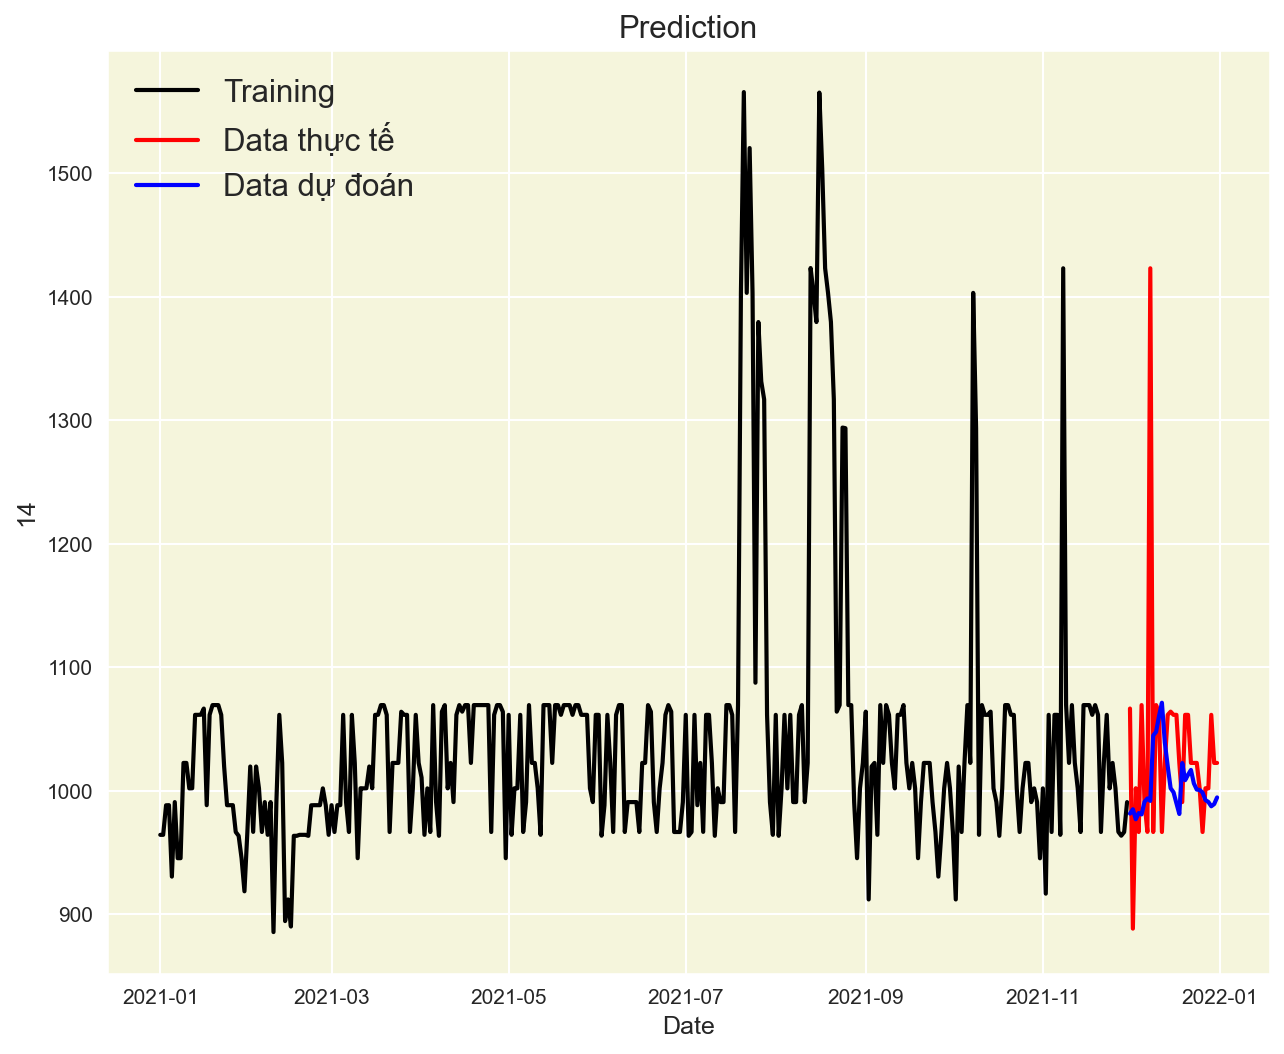

In [117]:
plt.figure(figsize=(10, 8), dpi=150)
plt.rcParams['axes.facecolor'] = 'beige'
plt.rc('axes',edgecolor='white')
plt.plot(df['Ngày'].iloc[:-test_size], scaler.inverse_transform(train_data), color='black', lw=2)
plt.plot(df['Ngày'].iloc[-test_size:], y_test_true, color='red', lw=2)
plt.plot(df['Ngày'].iloc[-test_size:], y_test_pred, color='blue', lw=2)
plt.title('Prediction', fontsize=15)
plt.xlabel('Date', fontsize=12)
plt.ylabel('14', fontsize=12)
plt.legend(['Training', 'Data thực tế', 'Data dự đoán'], loc='upper left', prop={'size': 15})
plt.grid(color='white')
plt.show()